<a href="https://colab.research.google.com/github/ememdeee/Python-Artificial-Intelligence-Stuff/blob/main/1_Visualization_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')

In [ ]:
df

,tanggal,kode_kelurahan,wilayah_kota,kecamatan,kelurahan,penerima_vaksinasi,dosis,jumlah_vaksin
0,2021-06-20,3171071002,JAKARTA PUSAT,TANAH ABANG,BENDUNGAN HILIR,PELAYAN PUBLIK,DOSIS 1,4103
1,2021-06-20,3171041006,JAKARTA PUSAT,SENEN,BUNGUR,PELAYAN PUBLIK,DOSIS 1,3152
2,2021-06-20,3171031006,JAKARTA PUSAT,KEMAYORAN,CEMPAKA BARU,PELAYAN PUBLIK,DOSIS 1,4962
3,2021-06-20,3171051002,JAKARTA PUSAT,CEMPAKA PUTIH,CEMPAKA PUTIH BARAT,PELAYAN PUBLIK,DOSIS 1,5356
4,2021-06-20,3171051001,JAKARTA PUSAT,CEMPAKA PUTIH,CEMPAKA PUTIH TIMUR,PELAYAN PUBLIK,DOSIS 1,4319
...,...,...,...,...,...,...,...,...
5869,2021-06-30,3101011002,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTARA,PULAU KELAPA,PELAYAN PUBLIK,DOSIS 2,812
5870,2021-06-30,3101011001,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTARA,PULAU PANGGANG,PELAYAN PUBLIK,DOSIS 2,798
5871,2021-06-30,3101021003,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU PARI,PELAYAN PUBLIK,DOSIS 2,450
5872,2021-06-30,3101021002,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU TIDUNG,PELAYAN PUBLIK,DOSIS 2,870


Cleaning data **delete: kode kelurahan,kelurahan,penerima vaksinasi & rubah penulisan dosis to numeric**

In [ ]:
df2=df.drop(columns=["kode_kelurahan","kelurahan","penerima_vaksinasi"])
df2=df2.sort_values("tanggal")

df2["dosis"]=df2["dosis"].replace(["DOSIS 1"],'1')
df2["dosis"]=df2["dosis"].replace(["DOSIS 2"],'2')

df2["dosis"] =pd.to_numeric(df2["dosis"])

tambahkan harike (0-10 karena hanya terjadi dalam 11 hari namun didata penuh perubahan setiap daerah +- 500 area)

In [ ]:
df2['Harike']=(pd.to_datetime(df2['tanggal'])-pd.to_datetime('2021-06-20')).dt.days

In [ ]:
df2

,tanggal,wilayah_kota,kecamatan,dosis,jumlah_vaksin,Harike
0,2021-06-20,JAKARTA PUSAT,TANAH ABANG,1,4103,0
1702,2021-06-20,JAKARTA BARAT,GROGOL PETAMBURAN,1,3370,0
1703,2021-06-20,JAKARTA BARAT,KALI DERES,1,10985,0
1704,2021-06-20,JAKARTA BARAT,GROGOL PETAMBURAN,1,5726,0
1705,2021-06-20,JAKARTA BARAT,GROGOL PETAMBURAN,1,6646,0
...,...,...,...,...,...,...
4252,2021-06-30,JAKARTA SELATAN,CILANDAK,2,4207,10
4251,2021-06-30,JAKARTA SELATAN,PANCORAN,2,1022,10
4250,2021-06-30,JAKARTA SELATAN,JAGAKARSA,2,3076,10
4257,2021-06-30,JAKARTA SELATAN,KEBAYORAN LAMA,2,2980,10


**LINE**

In [ ]:
jumlah=[]                                 #jumlah tervaksin perhari
for i in range (11):
  temp=df2[df2['Harike']==i]              #hitung jumlah per hari(1-11)
  temp=temp['jumlah_vaksin'].sum()
  jumlah.append(temp)
print(jumlah)

[2120263, 2146454, 2210521, 2245395, 2345792, 2416116, 2489586, 2515247, 2525680, 2596925, 2669138]


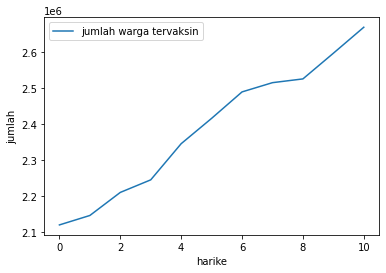

In [ ]:
Hari=[0,1,2,3,4,5,6,7,8,9,10]
plt.plot(Hari, jumlah)
plt.legend(["jumlah warga tervaksin"])
plt.xlabel("harike")
plt.ylabel("jumlah")
plt.show()

Visualisasi **Bar** (Harike 0 = 2021-06-20)

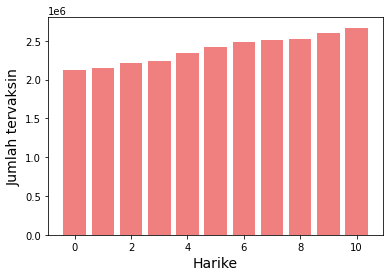

In [ ]:
plt.bar(Hari, jumlah, color='lightcoral')
plt.xlabel('Harike', size=14)
plt.ylabel('Jumlah tervaksin', size=14)
plt.show()

Diagram **Pie** 

In [ ]:
Jakarta_pusat=df2[df2['wilayah_kota']=='JAKARTA PUSAT']
Jakarta_utara=df2[df2['wilayah_kota']=='JAKARTA UTARA']
Jakarta_barat=df2[df2['wilayah_kota']=='JAKARTA BARAT']
Jakarta_selatan=df2[df2['wilayah_kota']=='JAKARTA SELATAN']
Jakarta_timur=df2[df2['wilayah_kota']=='JAKARTA TIMUR']
Jakarta_kab=df2[df2['wilayah_kota']=='KAB.ADM.KEP.SERIBU']

In [ ]:
wilayahKota_array=[Jakarta_pusat,Jakarta_utara,Jakarta_barat,Jakarta_selatan,Jakarta_timur,Jakarta_kab]
jumlhWilayahKota_array=[]

for i in range (6):
  total_rows = len(wilayahKota_array[i])
  #print(total_rows)
  jumlhWilayahKota_array.append(total_rows)
  
print(jumlhWilayahKota_array)

[968, 682, 1232, 1430, 1430, 132]


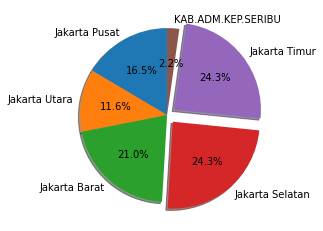

In [ ]:
mylabels=["Jakarta Pusat","Jakarta Utara","Jakarta Barat","Jakarta Selatan","Jakarta Timur","KAB.ADM.KEP.SERIBU"]
myexplode = [0, 0, 0, 0.1,0.1,0]

plt.pie(jumlhWilayahKota_array,labels = mylabels, explode = myexplode, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

**3D Scatter Plot**

pilih salah satu

In [ ]:
z = df2['jumlah_vaksin']
x = df2['Harike']
y = df2['dosis']

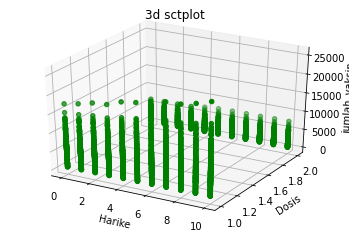

In [ ]:
fig = plt.figure()
ax=plt.axes(projection="3d")

ax.scatter(x,y,z,color='green')

ax.set(title='3d sctplot',
        xlabel='Harike',
        ylabel='Dosis',
        zlabel='jumlah_vaksin')

plt.show()